In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [98]:
# read in csv 
df = pd.read_csv("../Resources/race_data.csv")

In [99]:
# view dataset of mmr stratified by race 
df.head()

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1,2016,Black or African American,Not Hispanic or Latino,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298
1,Alabama,1,2016,White,Not Hispanic or Latino,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298
2,Alabama,1,2017,Black or African American,Not Hispanic or Latino,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298
3,Alabama,1,2017,White,Not Hispanic or Latino,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298
4,Alabama,1,2018,Black or African American,Not Hispanic or Latino,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298


### Viewing Distribution of Data with Histograms by Race

In [ ]:
# create dataframes for mmr data for each race in our dataset

# african american, not hispanic or latino
af_amer_mmr = df.loc[(df["race"] == "Black or African American") & (df["hispanic_origin"] == "Not Hispanic or Latino")]

# white, not hispanic or latino
wh_mmr = df.loc[(df["race"] == "White") & (df["hispanic_origin"] == "Not Hispanic or Latino")]

# white, hispanic or latino
wh_hisp_mmr = df.loc[(df["race"] == "White") & (df["hispanic_origin"] == "Hispanic or Latino")]

# asian, not hispanic or latino
asian_mmr = df.loc[(df["race"] == "Asian or Pacific Islander") & (df["hispanic_origin"] == "Not Hispanic or Latino")]

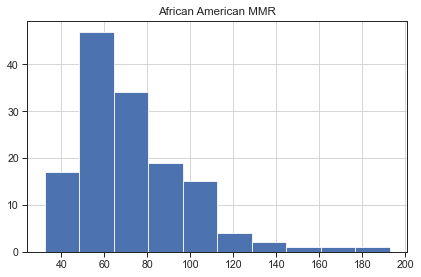

In [270]:
af_amer_hist = af_amer_mmr[["mmr_by_race"]].hist()
af_amer_hist

plt.title("African American MMR")
plt.tight_layout()
plt.show()

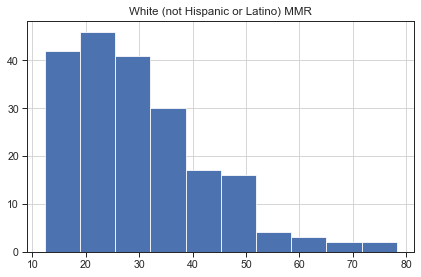

In [271]:
wh_mmr_hist = wh_mmr[["mmr_by_race"]].hist()
wh_mmr_hist

plt.title("White (not Hispanic or Latino) MMR")
plt.tight_layout()
plt.show()

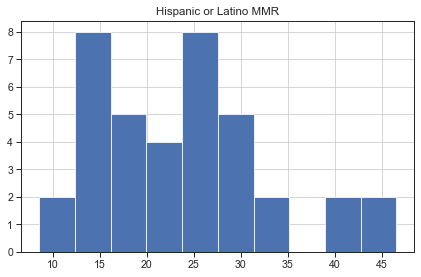

In [273]:
hisp_mmr_hist = wh_hisp_mmr[["mmr_by_race"]].hist()

plt.title("Hispanic or Latino MMR")
plt.tight_layout()
plt.show()

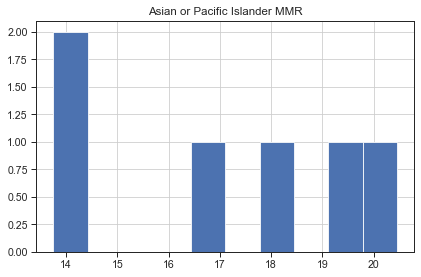

In [284]:
asian_mmr_hist = asian_mmr[["mmr_by_race"]].hist()

plt.title("Asian or Pacific Islander MMR")
plt.tight_layout()
plt.show()

### Create a Heatmap for Viewing Correlations in Dataset

In [103]:
# binary encoding with preserving all columns for heatmap
df_binary_encoded = pd.get_dummies(df, columns=["race", "hispanic_origin"])
df_binary_encoded

,state,state_code,year,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
0,Alabama,1,2016,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
1,Alabama,1,2016,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
2,Alabama,1,2017,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
3,Alabama,1,2017,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
4,Alabama,1,2018,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,West Virginia,54,2018,16785,10,59.58,853052,US.WV,WV,38.597626,-80.454903,0,0,1,0,1
384,Wisconsin,55,2009,52462,10,19.06,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1
385,Wisconsin,55,2011,50500,10,19.80,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1
386,Wisconsin,55,2014,49440,13,26.29,2409803,US.WI,WI,43.784440,-88.787868,0,0,1,0,1


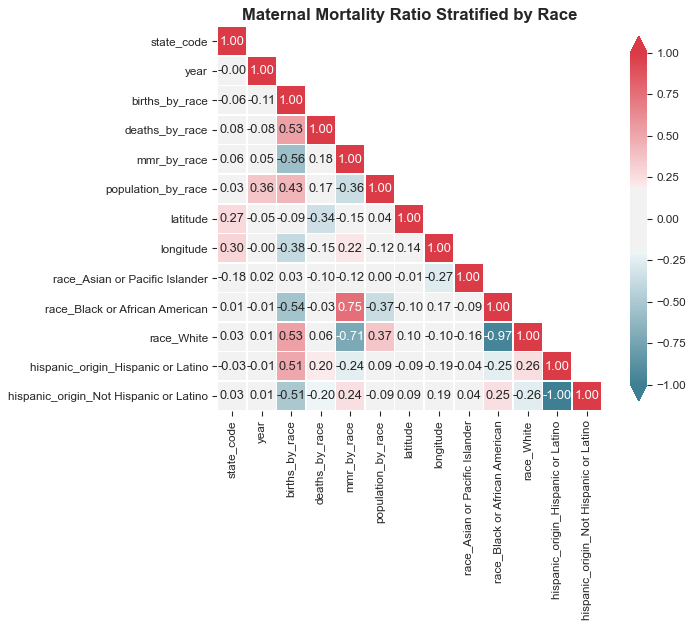

In [296]:
# entire df with binary_encoded data for heatmap
fig, ax = plt.subplots(figsize=(10, 8), dpi=80, facecolor="w", edgecolor="k")

# finding correlation for each feature in dataset 
corr = df_binary_encoded.corr()

# styling guided by https://www.kaggle.com/teampark/mortality-rate-exploration-and-visualization
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# include diagonal elements also
mask[np.diag_indices_from(mask)] = False
sns.set(context="paper", style="ticks", font_scale=1.2)

# adjust title and fontsize 
ax.set(title="Maternal Mortality Ratio Stratified by Race")
plt.title("Maternal Mortality Ratio Stratified by Race", fontsize=15, fontweight="bold")

# plotting the heatmap
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, sep=50, as_cmap=True),
            square=True, linewidths=.5, annot=True, ax=ax, fmt=".2f", 
            cbar_kws={"shrink": .95, "extend": "both"})

plt.tight_layout()

# saving the heatmap
plt.savefig("../../static/img/heatmap_mmr_strat_by_race.png")

### Linear Regression Model 

#### setting x and y values

In [163]:
# setting our X and y values for mmr for all races 
X = df_binary_encoded[["race_Asian or Pacific Islander", "race_Black or African American",
                       "race_White", "hispanic_origin_Hispanic or Latino",
                       "hispanic_origin_Not Hispanic or Latino", 
                       "births_by_race","deaths_by_race", "population_by_race"]]
y = df_binary_encoded["mmr_by_race"].values.reshape(-1, 1)
print(X.shape, y.shape)

(388, 8) (388, 1)


#### Train, Test Split

In [164]:
# use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino,births_by_race,deaths_by_race,population_by_race
145,0,0,1,0,1,33583,16,0
7,0,0,1,0,1,33892,17,1660160
19,0,0,1,0,1,23968,10,1125656
262,0,1,0,0,1,28857,11,1221722
367,0,0,1,0,1,38473,11,1197984


In [173]:
y_train.max()
# y_train.min()

192.68

#### Fitting the model with non-scaled data 

In [167]:
# running model without scaling data
from sklearn.linear_model import LinearRegression
model_no_scale = LinearRegression(n_jobs=500)
model_no_scale.fit(X_train, y_train)

LinearRegression(n_jobs=500)

In [168]:
# find the r2
r_sq_no_scale = model_no_scale.score(X_train, y_train)
r_sq_no_scale
print ("Coefficient of determination (R2):", r_sq_no_scale)

Coefficient of determination (R2): 0.7590260135162785


#### Scoring the model on testing and training data

In [162]:
# make predictions and display r2 for testing and training data without scaling
from sklearn.metrics import mean_squared_error

predictions1 = model_no_scale.predict(X_test)
MSE1 = mean_squared_error(y_test, predictions1)

r2_testing1 = model_no_scale.score(X_test, y_test)
r2_training1 = model_no_scale.score(X_train, y_train)

print(f"MSE: {MSE1}") 
print(f"R2 Testing: {r2_testing1}") 
print(f"R2 Training: {r2_training1}")

MSE: 198.43191423230274
R2 Testing: 0.7576070800890726
R2 Training: 0.7590260135162785


#### Plotting the non-scaled training and testing data

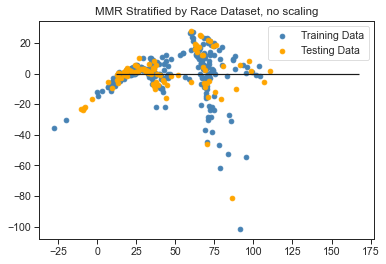

In [289]:
# plot data without scaling 
plt.figure(figsize=(6,4))
plt.scatter(model_no_scale.predict(X_train), model_no_scale.predict(X_train) - y_train, c="steelblue", label="Training Data")
plt.scatter(model_no_scale.predict(X_test), model_no_scale.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("MMR Stratified by Race Dataset, no scaling")
plt.show()

#### Scaling the data with standard scaler 

In [111]:
# choosing standard scaler because we know our data has outliers
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [112]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

#### Fitting Linear Regression model with scaled data

In [113]:
# running our model on scaled data 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [114]:
# find the r2 for scaled training data
r_sq = model.score(X_train_scaled, y_train_scaled)
r_sq
print ("Coefficient of determination (R2):", r_sq)

Coefficient of determination (R2): 0.7580777486925958


#### Plotting the scaled training and testing data

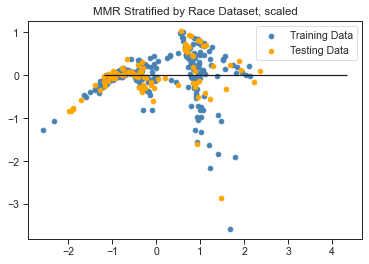

In [290]:
# Plot the results 
plt.figure(figsize=(6,4))
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="steelblue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("MMR Stratified by Race Dataset, scaled")
plt.show()

#### RFE to Identify Insignificant Variables

In [116]:
# RFE before predictions to Identify Insignificant Variables 
from sklearn.feature_selection import RFE
# Create the RFE model
rfe = RFE(model)
# Fit model
rfe = rfe.fit(X_train_scaled, y_train_scaled)
# summarize the selection of the attributes
rfe_df = pd.DataFrame({
    'features': X.columns,
    'support': rfe.support_,
    'ranking': rfe.ranking_
})
rfe_df
# experimented with dropping the features that were false for support for the y
# the results did not improve our r2 value 

,features,support,ranking
0,race_Asian or Pacific Islander,True,1
1,race_Black or African American,True,1
2,race_White,True,1
3,hispanic_origin_Hispanic or Latino,False,2
4,hispanic_origin_Not Hispanic or Latino,True,1
5,births_by_race,False,3
6,deaths_by_race,False,4
7,population_by_race,False,5


#### Scoring the model on testing and training data

In [117]:
# make predictions and display r2 for scaled testing and training data
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)

r2_testing = model.score(X_test_scaled, y_test_scaled)
r2_training = model.score(X_train_scaled, y_train_scaled)

print(f"MSE: {MSE}") 
print(f"R2 Testing: {r2_testing}") 
print(f"R2 Training: {r2_training}")

MSE: 0.25467292572555933
R2 Testing: 0.7541995172092294
R2 Training: 0.7580777486925958


#### Visualizing mmr by race across 2009-2019

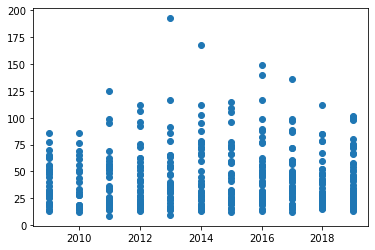

In [118]:
# visualize mmr_by_race across years data was collected
X1 = df_binary_encoded["year"].values.reshape(-1,1)
y1 = df_binary_encoded["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X1, y1)

In [119]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [120]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [121]:
#make predictions and display r2

from sklearn.metrics import mean_squared_error

predictions1 = model1.predict(X1_test)
MSE1 = mean_squared_error(y1_test, predictions1)
r2 = model1.score(X1_test, y1_test)

print(f"MSE: {MSE1}, R2: {r2}")

MSE: 820.2420577481126, R2: -0.0019601341876613887


In [122]:
# Make predictions for next 11 years
future_mmr =[]
for i in range(2020, 2031):
    r= model1.predict([[i]])
    future_mmr.append(float(r))
      
    
future_mmr

[46.56959433593698,
 46.77622315946206,
 46.98285198298714,
 47.18948080651222,
 47.3961096300373,
 47.60273845356238,
 47.809367277087404,
 48.01599610061248,
 48.22262492413756,
 48.42925374766264,
 48.63588257118772]

In [123]:
# create a dictionary to hold predicted values
predicted_mmr = {
    "year": [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "mmr_by_race": future_mmr
}

# create a dataframe
predicted_mmr_df = pd.DataFrame(predicted_mmr)
predicted_mmr_df

,year,mmr_by_race
0,2020,46.569594
1,2021,46.776223
2,2022,46.982852
3,2023,47.189481
4,2024,47.396110
5,2025,47.602738
6,2026,47.809367
7,2027,48.015996
8,2028,48.222625
9,2029,48.429254


Text(0, 0.5, 'Maternal Mortality Ratio')

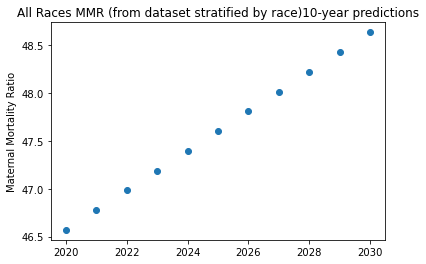

In [124]:
X3 = predicted_mmr_df["year"].values.reshape(-1,1)
y3 = predicted_mmr_df["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X3,y3)
plt.title("All Races MMR (from dataset stratified by race)10-year predictions")
plt.ylabel("Maternal Mortality Ratio")

In [125]:
# combine the prediction dataframe with the original dataframe
dataframes = [df, predicted_mmr_df]
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.head()

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1.0,2016,Black or African American,Not Hispanic or Latino,17989.0,14.0,77.83,0.0,US.AL,AL,32.318231,-86.902298
1,Alabama,1.0,2016,White,Not Hispanic or Latino,35319.0,18.0,50.96,0.0,US.AL,AL,32.318231,-86.902298
2,Alabama,1.0,2017,Black or African American,Not Hispanic or Latino,18354.0,25.0,136.21,704201.0,US.AL,AL,32.318231,-86.902298
3,Alabama,1.0,2017,White,Not Hispanic or Latino,34784.0,15.0,43.12,1655605.0,US.AL,AL,32.318231,-86.902298
4,Alabama,1.0,2018,Black or African American,Not Hispanic or Latino,17939.0,14.0,78.04,706754.0,US.AL,AL,32.318231,-86.902298


### Logistic Regression Model

In [182]:
df_binary_encoded.head()

,state,state_code,year,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino
0,Alabama,1,2016,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
1,Alabama,1,2016,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
2,Alabama,1,2017,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298,0,1,0,0,1
3,Alabama,1,2017,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298,0,0,1,0,1
4,Alabama,1,2018,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298,0,1,0,0,1


In [184]:
# viewing the range of the mmr data 
agg = df_binary_encoded.agg({"mmr_by_race": ["mean", "median", "max", "min"]})
agg

,mmr_by_race
mean,44.795902
median,36.530000
max,192.680000
min,8.550000


#### Binning the mmr data into low, medium, and high categories

In [186]:
# setting conditions to make outcome categorical
conditions = [
    (df_binary_encoded["mmr_by_race"] <= 20),
    (df_binary_encoded["mmr_by_race"] > 20) & (df_binary_encoded["mmr_by_race"] < 50),
    (df_binary_encoded["mmr_by_race"] > 50)
    ]

values = ["low", "medium", "high"]

df_binary_encoded["mmr_risk_category"] = np.select(conditions, values)
df_binary_encoded

,state,state_code,year,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino,mmr_risk_category
0,Alabama,1,2016,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298,0,1,0,0,1,high
1,Alabama,1,2016,35319,18,50.96,0,US.AL,AL,32.318231,-86.902298,0,0,1,0,1,high
2,Alabama,1,2017,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298,0,1,0,0,1,high
3,Alabama,1,2017,34784,15,43.12,1655605,US.AL,AL,32.318231,-86.902298,0,0,1,0,1,medium
4,Alabama,1,2018,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298,0,1,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,West Virginia,54,2018,16785,10,59.58,853052,US.WV,WV,38.597626,-80.454903,0,0,1,0,1,high
384,Wisconsin,55,2009,52462,10,19.06,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1,low
385,Wisconsin,55,2011,50500,10,19.80,0,US.WI,WI,43.784440,-88.787868,0,0,1,0,1,low
386,Wisconsin,55,2014,49440,13,26.29,2409803,US.WI,WI,43.784440,-88.787868,0,0,1,0,1,medium


In [189]:
# drop columns
df_binary_encoded.drop(columns=["mmr_by_race", "latitude", "longitude", "id", "state_abbv"])

,state,state_code,year,births_by_race,deaths_by_race,population_by_race,race_Asian or Pacific Islander,race_Black or African American,race_White,hispanic_origin_Hispanic or Latino,hispanic_origin_Not Hispanic or Latino,mmr_risk_category
0,Alabama,1,2016,17989,14,0,0,1,0,0,1,high
1,Alabama,1,2016,35319,18,0,0,0,1,0,1,high
2,Alabama,1,2017,18354,25,704201,0,1,0,0,1,high
3,Alabama,1,2017,34784,15,1655605,0,0,1,0,1,medium
4,Alabama,1,2018,17939,14,706754,0,1,0,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...
383,West Virginia,54,2018,16785,10,853052,0,0,1,0,1,high
384,Wisconsin,55,2009,52462,10,0,0,0,1,0,1,low
385,Wisconsin,55,2011,50500,10,0,0,0,1,0,1,low
386,Wisconsin,55,2014,49440,13,2409803,0,0,1,0,1,medium


In [211]:
# viewing how the data is distributed into bins
df_binary_encoded["mmr_risk_category"].value_counts()

medium    184
high      132
low        72
Name: mmr_risk_category, dtype: int64

#### set x and y values

In [198]:
# setting our X and y values for mmr for all races 
XL = df_binary_encoded[["race_Asian or Pacific Islander", "race_Black or African American",
                       "race_White", "hispanic_origin_Hispanic or Latino",
                       "hispanic_origin_Not Hispanic or Latino", 
                       "births_by_race","deaths_by_race", "population_by_race"]]
yL = df_binary_encoded["mmr_risk_category"].values.reshape(-1, 1)
print(XL.shape, yL.shape)

(388, 8) (388, 1)


#### create train, test split

In [199]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

XL_train, XL_test, yL_train, yL_test = train_test_split(XL, yL, random_state=42)

#### scale data with MinMax Scaler

In [203]:
from sklearn.preprocessing import MinMaxScaler
XL_scaler = MinMaxScaler().fit(XL_train)

XL_scaler_train = XL_scaler.transform(XL_train)
XL_scaler_test = XL_scaler.transform(XL_test)

In [208]:
# create the logistic regression model
from sklearn.linear_model import LogisticRegression
modelL = LogisticRegression(max_iter=1000)
modelL.fit(XL_train, np.ravel(yL_train))

LogisticRegression(max_iter=1000)

#### Scoring the model on testing and training data

In [209]:
# make predictions and display r2 for scaled testing and training data
from sklearn.metrics import mean_squared_error

#predictionsL = modelL.predict(XL_scaler_test)
#MSEL = mean_squared_error(yL_scaler_test, predictionsL)

rL_testing = modelL.score(XL_scaler_test, yL_test)
rL_training = modelL.score(XL_scaler_train, yL_train)

#print(f"MSE: {MSEL}") 
print(f"R2 Testing: {rL_testing}") 
print(f"R2 Training: {rL_training}")

R2 Testing: 0.4536082474226804
R2 Training: 0.4845360824742268


#### African American MMR 

In [153]:
# setting our X and y values for mmr for african american exclusively
# adjusting our X values (removing births and population) after running RFE
# adjusting our X values (removing deaths) after running RFE
# removing X values makes our R2 go down, adding X values back to our model
X_af_am = df_binary_encoded[["race_Black or African American", "births_by_race", "deaths_by_race", "population_by_race"]]
y_af_am = df_binary_encoded["mmr_by_race"].values.reshape(-1, 1)
print(X_af_am.shape, y_af_am.shape)

(388, 4) (388, 1)


In [154]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_af_am_train, X_af_am_test, y_af_am_train, y_af_am_test = train_test_split(X_af_am, y_af_am, random_state=42)

In [155]:
# running African American model without scaling data
from sklearn.linear_model import LinearRegression
model_af_amer = LinearRegression()
model_af_amer.fit(X_af_am_train, y_af_am_train)

LinearRegression()

In [156]:
# RFE before predictions to Identify Insignificant Variables 
from sklearn.feature_selection import RFE
# Create the RFE model
rfe2 = RFE(model)
# Fit model
rfe2 = rfe2.fit(X_af_am_train, y_af_am_train)
# summarize the selection of the attributes
rfe2_df = pd.DataFrame({
    'features': X_af_am.columns,
    'support': rfe2.support_,
    'ranking': rfe2.ranking_
})
rfe2_df

,features,support,ranking
0,race_Black or African American,True,1
1,births_by_race,False,2
2,deaths_by_race,True,1
3,population_by_race,False,3


In [157]:
# make predictions and display r2 for African American exclusive testing and training data
from sklearn.metrics import mean_squared_error

predictions3 = model_af_amer.predict(X_af_am_test)
MSE3 = mean_squared_error(y_af_am_test, predictions3)

r2_testing_af_am = model_af_amer.score(X_af_am_test, y_af_am_test)
r2_training_af_am = model_af_amer.score(X_af_am_train, y_af_am_train)

print(f"MSE: {MSE3}") 
print(f"R2 Testing: {r2_testing_af_am}") 
print(f"R2 Training: {r2_training_af_am}")

MSE: 205.8864534895182
R2 Testing: 0.7485010472004732
R2 Training: 0.7560500695636392


In [126]:
af_amer_mmr.head()

,state,state_code,year,race,hispanic_origin,births_by_race,deaths_by_race,mmr_by_race,population_by_race,id,state_abbv,latitude,longitude
0,Alabama,1,2016,Black or African American,Not Hispanic or Latino,17989,14,77.83,0,US.AL,AL,32.318231,-86.902298
2,Alabama,1,2017,Black or African American,Not Hispanic or Latino,18354,25,136.21,704201,US.AL,AL,32.318231,-86.902298
4,Alabama,1,2018,Black or African American,Not Hispanic or Latino,17939,14,78.04,706754,US.AL,AL,32.318231,-86.902298
6,Alabama,1,2019,Black or African American,Not Hispanic or Latino,18620,15,80.56,709544,US.AL,AL,32.318231,-86.902298
20,California,6,2009,Black or African American,Not Hispanic or Latino,31090,17,54.68,1192173,US.CA,CA,36.778261,-119.417932


In [127]:
# set our x and y
X4 = af_amer_mmr[["year"]]
y4 = af_amer_mmr[["mmr_by_race"]]
print(X.shape, y.shape)

(388, 8) (388, 1)


In [128]:
# use test, train, split to create training and testing data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=42)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)

(105, 1)
(105, 1)
(36, 1)


In [129]:
# create the linear regression model
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X4_train, y4_train)

LinearRegression()

In [130]:
from sklearn.metrics import mean_squared_error

predictions = model2.predict(X4_test)
MSE = mean_squared_error(y4_test, predictions)
r2 = model2.score(X4_test, y4_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 487.18502790582744, R2: -0.17542467279890794


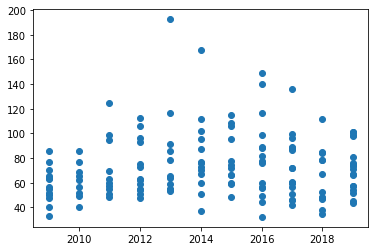

In [131]:

# visualize african american mmr
X4 = af_amer_mmr["year"].values.reshape(-1,1)
y4 = af_amer_mmr["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X4,y4)

In [132]:
# Make predictions for next 11 years
future_af_amer_mmr =[]
for i in range(2020, 2031):
    r= model2.predict([[i]])
    future_af_amer_mmr.append(float(r))
      
    
future_af_amer_mmr

[76.34695944373334,
 76.54468870010476,
 76.74241795647623,
 76.9401472128477,
 77.13787646921918,
 77.33560572559065,
 77.53333498196213,
 77.73106423833354,
 77.92879349470502,
 78.1265227510765,
 78.32425200744797]

In [133]:
# create a dictionary to hold predicted values
predicted_af_amer_mmr = {
    "year": [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "mmr_by_race": future_af_amer_mmr
}

# create a dataframe
predicted_af_amer_mmr_df = pd.DataFrame(predicted_af_amer_mmr)
predicted_af_amer_mmr_df

,year,mmr_by_race
0,2020,76.346959
1,2021,76.544689
2,2022,76.742418
3,2023,76.940147
4,2024,77.137876
5,2025,77.335606
6,2026,77.533335
7,2027,77.731064
8,2028,77.928793
9,2029,78.126523


Text(0, 0.5, 'Maternal Mortality Ratio')

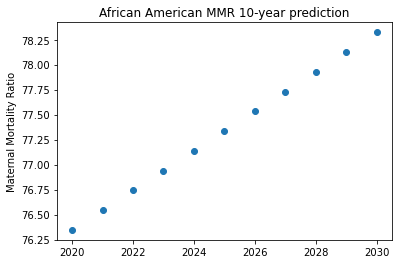

In [134]:
X6 = predicted_af_amer_mmr_df["year"].values.reshape(-1,1)
y6 = predicted_af_amer_mmr_df["mmr_by_race"].values.reshape(-1,1)
plt.scatter(X6,y6)
plt.title("African American MMR 10-year prediction")
plt.ylabel("Maternal Mortality Ratio")

### Analysis

 - For our MMR data stratified by race, the MMR wasn't clearly increasing over our selected timeframe of 2009-2019. 
 - We used a linear regression model and experimented with feature selection after running RFE to identify insignificant variables. However, removing the insignificant variables did not improve the R2 value for any of the linear regression models. 
 
 - We tried binning our mmr data into three categories:
     - low
     - medium
     - high
 - After binning, we used a logistic regression model, but the scoring of this model was worse than the linear regressions we'd already run. 
 
 - Our highest scoring model was Linear Regression with non-scaled data, using each of our race an hispanic origin categories, and birth, death, and population data, straitified by race. These are the resulting scores: 
 
    - MSE: 198.43191423230274
    - R2 Testing: 0.7576070800890726
    - R2 Training: 0.7590260135162785